**FLOYD WARSHALL**

original Matrix
0	5	∞	∞	
50	0	15	5	
30	∞	0	15	
15	∞	5	0	
After step 1 Matrix A:
0	5	∞	∞	
50	0	15	5	
30	35	0	15	
15	20	5	0	
After step 2 Matrix A:
0	5	20	10	
50	0	15	5	
30	35	0	15	
15	20	5	0	
After step 3 Matrix A:
0	5	20	10	
45	0	15	5	
30	35	0	15	
15	20	5	0	
After step 4 Matrix A:
0	5	15	10	
20	0	10	5	
30	35	0	15	
15	20	5	0	
The resultant matrix is:
0	5	15	10	
20	0	10	5	
30	35	0	15	
15	20	5	0	


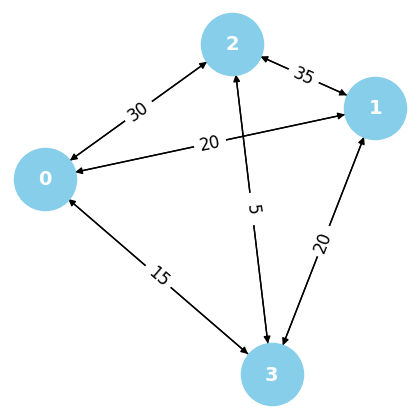

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
nV=4
INF=999

def floyd(G):
  dist=list(map(lambda p: list(map(lambda q:q,p)),G)) #copying the graph G into dist
  for r in range(nV):
    for p in range(nV):
      for q in range(nV):
        dist[p][q]=min(dist[p][q],dist[p][r]+dist[r][q])
  showMatrix(dist)

#Function to visualize the graph using Networkx
def draw_graph(graph_matrix):
  G=nx.DiGraph()
  n=len(graph_matrix)

  #Add edges with weights
  for i in range(n):
    for j in range(n):
      if graph_matrix[i][j] != INF and i!=j:
        G.add_edge(i,j,weight=graph_matrix[i][j])
  #Draw the graph
  pos=nx.spring_layout(G)
  edge_labels=nx.get_edge_attributes(G,'weight')
  plt.figure(figsize=(4,4))
  nx.draw(G,pos,with_labels=True,node_color='skyblue',node_size=2000,
          font_color='white',font_size=14,font_weight='bold')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=12)
  plt.show()

def stepbystepfloydAlgo(graph):
  print('original Matrix')
  showMatrix(graph)
  for k in range(nV):
    for i in range(nV):
      for j in range(nV):
        graph[i][j]=min(graph[i][j],graph[i][k]+graph[k][j])
    print('After step',k+1,'Matrix A:')
    showMatrix(graph)

def showMatrix(matrix):
  for i in range(nV):
    for j in range(nV):
      if(matrix[i][j]==INF):
        print(u"\u221E",end="\t")
      else:
        print(matrix[i][j],end="\t")
    print()
G=[[0,5,INF,INF],
   [50,0,15,5],
   [30,INF,0,15],
   [15,INF,5,0]]
stepbystepfloydAlgo(G)
print("The resultant matrix is:")
floyd(G)



#draw the graph
draw_graph(G)